In [1]:
#Importing necessary Libraries
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
salary = pd.read_csv('C:\\Users\\ccuti\\Data Science\\Project\\Texas Salary Prediction\\data\\salary.csv')

In [3]:
salary.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [4]:
salary.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [5]:
salary.info

<bound method DataFrame.info of         AGENCY                                        AGENCY NAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
0       RUCKER                          MORTON                

In [6]:
salary.isna().sum() # checking sum of missing values

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [7]:
salary.shape

(149481, 21)

In [8]:
##EDA

In [9]:
#follwing columns have lots of missing data so it will be droppped
salary.drop(['duplicated','multiple_full_time_jobs','combined_multiple_jobs',
             'summed_annual_salary','hide_from_search'], axis=1, inplace=True)

In [10]:
salary.rename(columns={'Ag':'Agency_name','Last Name':'Last_name','First Name':'First_name',
                     'CLASS CODE':'Class_code','CLASS TITLE':'C_T','Employ Date':'Employ_date',
                     'Hourly Rate':'Hrly_rate','Hours Per Week':'Hrs_per_wk','State No.':'State_number'},inplace=True)

In [11]:
status_count = salary.STATUS.value_counts()
print(status_count)

CRF - CLASSIFIED REGULAR FULL-TIME          142502
URF - UNCLASSIFIED REGULAR FULL-TIME          2363
CRP - CLASSIFIED REGULAR PART-TIME            1531
CTF - CLASSIFIED TEMPORARY FULL-TIME          1096
URP - UNCLASSIFIED REGULAR PART-TIME           950
ERF - EXEMPT REGULAR FULL-TIME                 923
CTP - CLASSIFIED TEMPORARY PART-TIME            81
UTP - UNCLASSIFIED TEMPORARY PART-TIME          21
UTF - UNCLASSIFIED TEMPORARY FULL-TIME          12
CTP - CLASSIFIED TEMPORARY FULL-TIME             1
ERP - EXEMPT REGULAR PART-TIME                   1
Name: STATUS, dtype: int64


<AxesSubplot:xlabel='ETHNICITY', ylabel='count'>

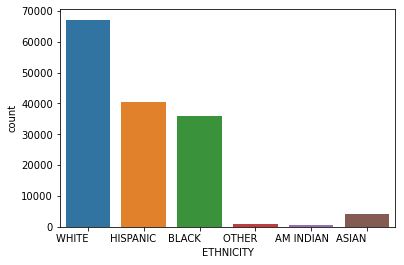

In [12]:
sns.countplot(salary.ETHNICITY)


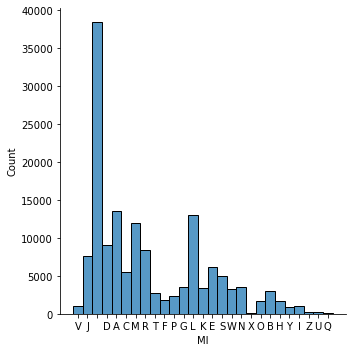

In [13]:
sns.displot(salary.MI)

In [14]:
## converting the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
salary.AGENCY=label.fit_transform(salary.AGENCY)
salary.ETHNICITY=label.fit_transform(salary.ETHNICITY)
salary.GENDER=label.fit_transform(salary.GENDER)
salary.STATUS=label.fit_transform(salary.STATUS)
salary.MI=label.fit_transform(salary.MI)
salary.C_T=label.fit_transform(salary.C_T)
salary.Class_code =label.fit_transform(salary.Class_code)

In [15]:
salary.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'Class_code',
       'C_T', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE', 'HRLY RATE',
       'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER'],
      dtype='object')

In [16]:
#Dropped agency name and First Name, because it can be categorized with index number
salary.drop(['AGENCY NAME','LAST NAME', 'FIRST NAME','STATE NUMBER','EMPLOY DATE'], axis=1, inplace=True)

<AxesSubplot:>

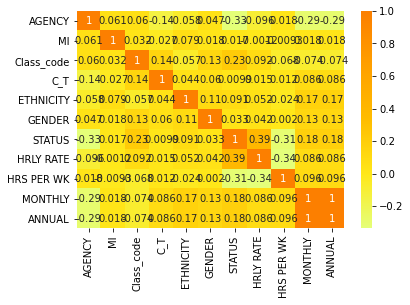

In [17]:
#correclation
corr = salary.corr()
corr
sns.heatmap(corr,cmap = 'Wistia',annot=True)

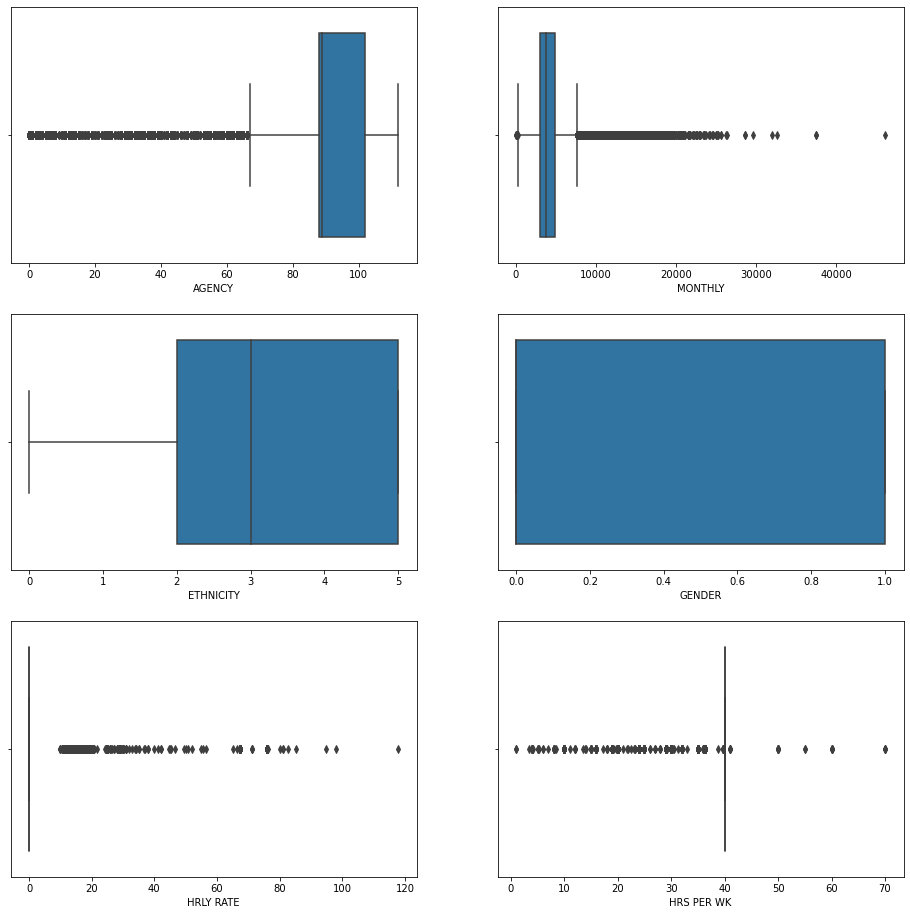

In [18]:
## Let's check for outliers 
fig, ax1 = plt.subplots(3, 2, figsize=(16, 16))
sns.boxplot(salary['AGENCY'],ax=ax1[0][0])
sns.boxplot(salary['MONTHLY'], ax=  ax1[0][1])
sns.boxplot(salary['ETHNICITY'], ax=  ax1[1][0])
sns.boxplot(salary['GENDER'], ax=  ax1[1][1])
sns.boxplot(salary['HRLY RATE'], ax=  ax1[2][0])
sns.boxplot(salary['HRS PER WK'], ax=  ax1[2][1])
plt.show()

In [19]:
#checking for normaility of the data that is by testing for skewness and kurtosis
from scipy import stats
for column in salary:
    print(stats.skew(salary[column]),column)

-1.445095378543151 AGENCY
0.5093708017230576 MI
-0.23205618137590403 Class_code
0.42449206710125237 C_T
-0.19699725847338503 ETHNICITY
0.28619968454706746 GENDER
5.6003213031589185 STATUS
15.917938906434207 HRLY RATE
-8.379193623324754 HRS PER WK
2.702777438248092 MONTHLY
2.7027774382480954 ANNUAL


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_sal = scaler.fit_transform(salary)

In [21]:
## Definig independent and dependent variables
X=salary.iloc[:,0:-1]
y=salary.ANNUAL
X.head()

,AGENCY,MI,Class_code,C_T,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY
0,25,22,1409,711,5,1,8,75.96150,29.0,9545.82
1,8,22,616,560,5,1,4,81.04454,4.0,1404.77
2,25,10,1409,711,5,1,8,75.96150,29.0,9545.82
3,8,10,616,560,5,1,4,81.04453,4.0,1404.77
4,102,0,810,292,3,0,0,0.00000,40.0,3284.27


In [22]:
#defining training and testing model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [23]:
## Model creation
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_hat=model.predict(X_test)

In [24]:
y_train_predict=model.predict(X_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_predict)
train_score

1.0

In [25]:
test_score=r2_score(y_test,y_hat)
test_score

1.0

In [26]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 


In [27]:

model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print('LinearRegression for training data: ',model.score(X_train,y_train)*100)
print('LinearRegression for test data :',model.score(X_test,y_test)*100)
print('Mean Squard Error is :',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error is :',mean_absolute_error(y_test, y_predict))

LinearRegression for training data:  100.0
LinearRegression for test data : 100.0
Mean Squard Error is : 2.964135561286827e-22
Mean Absolute Error is : 1.2475709211877704e-11


In [28]:
y_train_predict

array([37244.04, 36238.08, 64512.  , ..., 41769.24, 42702.  , 22275.24])